# Problem Statement
Management of diabetes in hospitalized patients has a significant impact on morbidity and mortality. However, there are a few national assessments of diabetes care during hospitalization which could serve as a baseline for change. We are using the analysis of a large clinical database to provide such an assessment and to find directions that might lead to improvements in patient safety. 
Based on the given information and data, we aim to build a model to predict whether the patient is at risk of diabetes or not. 


## Importing all required Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from math import sqrt

## Loading the Data

In [73]:
df = pd.read_csv("Final_Dataset.csv")

## Checking the data

In [74]:
df.head()  #df=data frame    displays first 5 values from beginning

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Information about variables

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


Outcome is the target variable while all others are the predictors. 

  
Out of the 9 columns, 7 are int type, while remaining 2 are float.  

  
It appears there are also no missing values.

## Checking for missing value in any column

In [76]:
# Are there any missing values ?
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Analysis of the data

In [77]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,264.55050,4277.501407,0.000,99.000,117.000,141.000,137135.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,38.82950,161.637650,10.000,24.000,29.000,40.000,6364.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


## Getting Unique Counts of all all Variables

In [78]:
for column in df[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]:
    print(column.upper(),': ',df[column].nunique()) #returns number of unique values for each column
    print(df[column].value_counts().sort_values())
    print('\n')

PREGNANCIES :  17
15      2
17      3
14      7
13     22
12     23
11     24
10     54
9      70
8      96
7     100
6     131
5     141
4     191
3     195
2     284
0     301
1     356
Name: Pregnancies, dtype: int64


GLUCOSE :  157
51      1
37      1
63      1
31      1
19      1
       ..
122    35
106    35
120    36
102    39
100    45
Name: Glucose, Length: 157, dtype: int64


BLOODPRESSURE :  47
40       2
24       2
95       2
38       3
114      3
102      3
122      3
30       3
61       4
55       4
108      5
104      5
46       6
110      7
98       8
96       8
100      9
106      9
44      11
92      12
48      13
85      14
94      18
65      19
75      20
52      29
56      31
54      31
50      31
86      53
58      54
90      55
84      61
66      65
88      67
82      83
0       90
60      92
76      93
62      94
80      98
72     118
64     120
68     125
78     128
70     144
74     145
Name: BloodPressure, dtype: int64


INSULIN :  182
188      1
326      1


# Replacing 0 to Nan

In [79]:
print('Before: ',df.shape)  #shape is used to fetch the dimensions of Pandas and NumPy type objects in python.
# Replace ? to Nan and remove all missing values
df.Glucose = df.Glucose.replace(to_replace = 0 , value =np.nan)
df.BloodPressure=df.BloodPressure.replace(to_replace = 0 , value =np.nan)
df.SkinThickness = df.SkinThickness.replace(to_replace = 0 , value =np.nan)
df.dropna(inplace=True) #dropna removes the rows that contains NULL values.  We must use the argument inplace=True or
# else the changes won’t be made to the original DataFrame. 
print('After: ',df.shape)

Before:  (2000, 9)
After:  (1408, 9)


## Checking for duplicate data

In [80]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 7


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1198,3,102.0,44.0,20.0,94,30.8,0.400,26,0
1398,1,91.0,64.0,24.0,0,29.2,0.192,21,0
1598,8,126.0,88.0,36.0,108,38.5,0.349,49,0
1698,3,106.0,54.0,21.0,158,30.9,0.292,24,0
1798,3,158.0,64.0,13.0,387,31.2,0.295,24,0
1898,5,95.0,72.0,33.0,0,37.7,0.370,27,0
1999,2,81.0,72.0,15.0,76,30.1,0.547,25,0


## Removing Duplicates

In [81]:
df.drop_duplicates(inplace=True) 

In [82]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(1401, 9)


## Checking for Outliers

<Axes: >

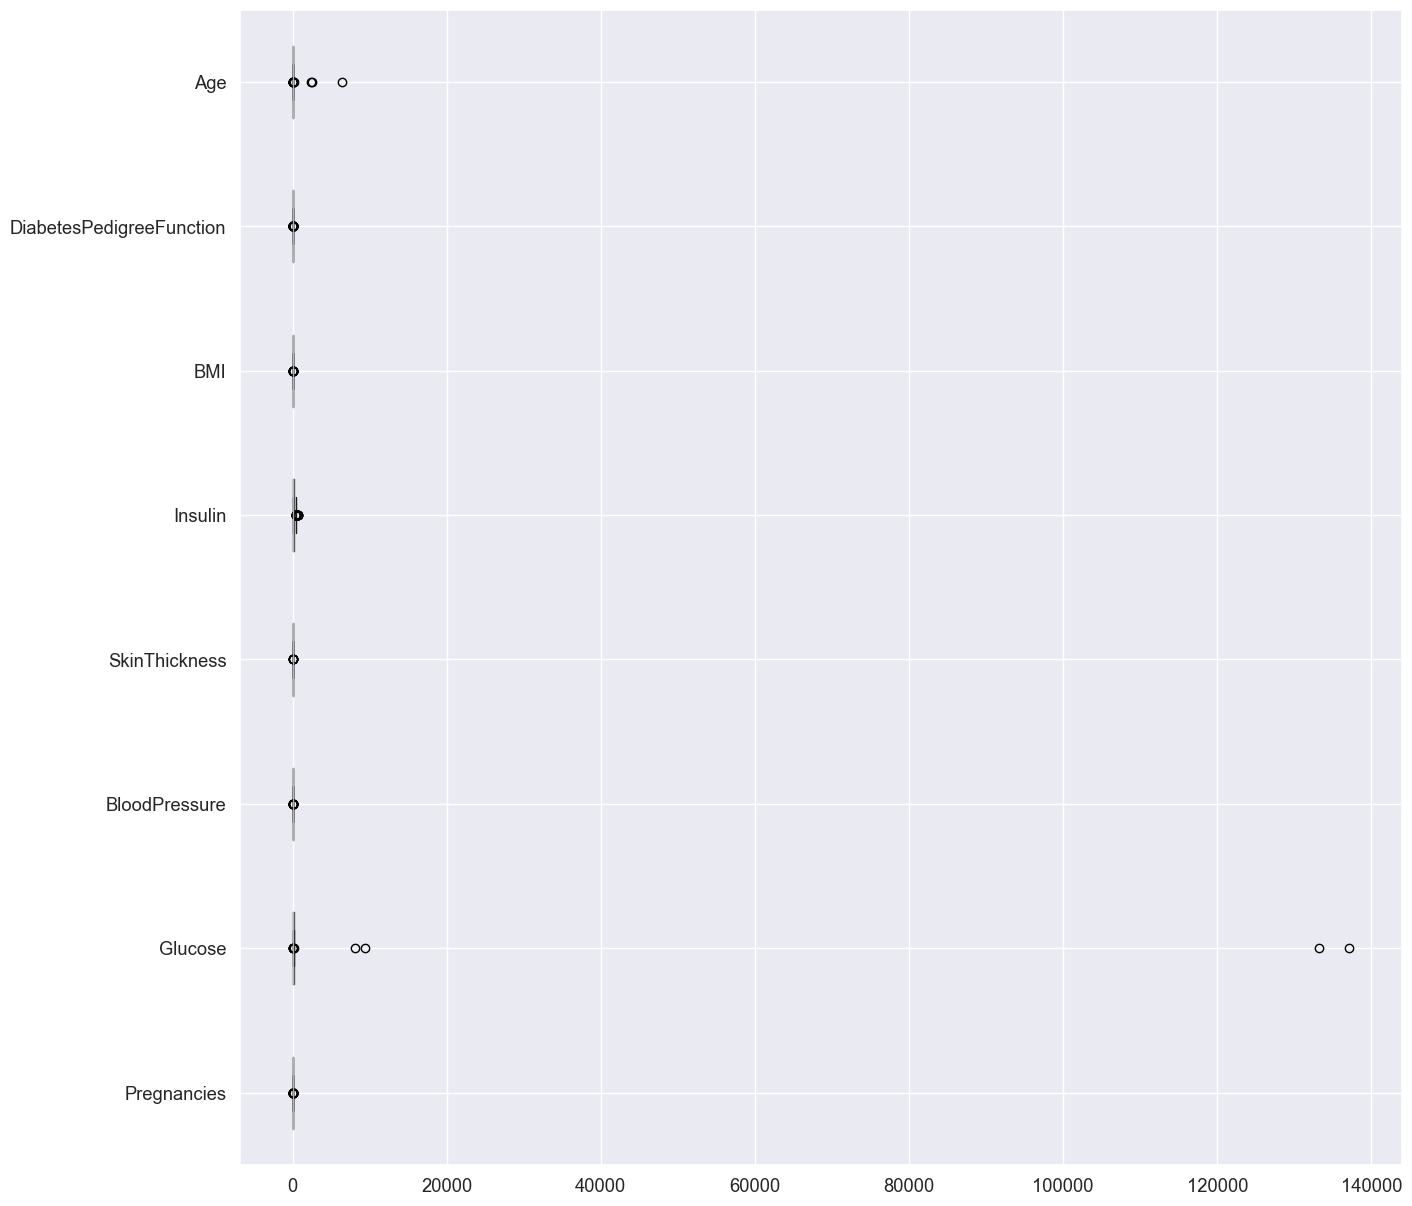

In [83]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].boxplot(vert=0)


There are outliers in all the variables. Random Forest can handle the outliers. 
Hence, Outliers are not treated for now, we will keep the data as it is.


## Checking pairwise distribution of continuous variables

In [ ]:
sns.pairplot(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

## Checking for Correlations

<Axes: >

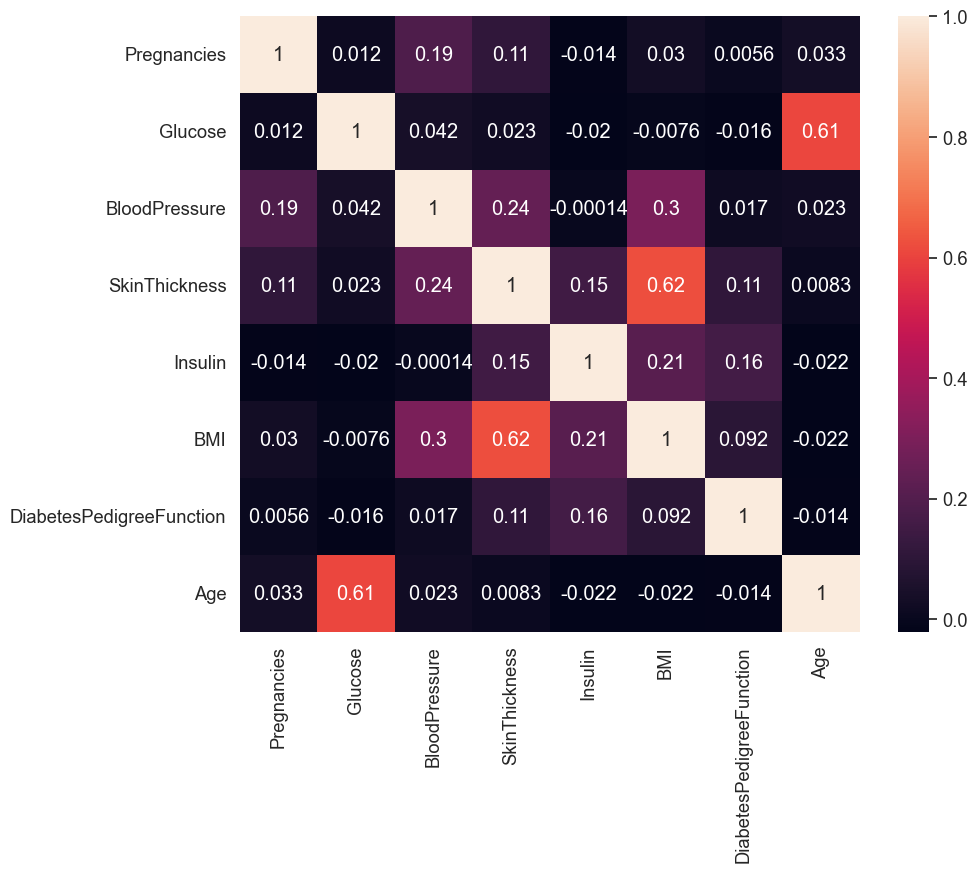

In [14]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].corr(), annot=True)

## Proportion of 1s and 0s

In [15]:
df.Outcome.value_counts(normalize=True) #With normalize set to True, returns the relative frequency by dividing all values by the sum of values

0    0.673091
1    0.326909
Name: Outcome, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes

## Extracting the target column training set and test set

In [16]:
X = df.drop("Outcome", axis=1)
#If axis zero (0) or index is selected, apply to each column. Default 0.
#If one (1) apply to each row.
y = df.pop("Outcome")

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.0,35.0,0,33.6,0.127,47
1,0,84.0,82.0,31.0,125,38.2,0.233,23
3,0,135.0,68.0,42.0,250,42.3,0.365,24
4,1,139.0,62.0,41.0,480,40.7,0.536,21
5,0,173.0,78.0,32.0,265,46.5,1.159,58


## Splitting data into training and test set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.3, random_state=1) 
#test_size=0.3 means that 30% of the data is for testing and the remaining 70% is for training.
#random_state pass an int for reproducible output across multiple function calls.
#random_state We can use any integer including 0, but not negative ones, only positive integers.
#for different integer values of random_state, we get different reproducible training and test sets.

## Checking the dimensions of the training and test data

In [18]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)   #train_labels and test_labels are being stored as a 1-D array. 
print('test_labels',test_labels.shape)

X_train (980, 8)
X_test (421, 8)
train_labels (980,)
test_labels (421,)


# Building a Decision Tree Classifier

In [19]:
param_grid = {
    'criterion': ['gini'], #default criteria for DT #criterion is function to measure quality of split
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [20]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

## Generating Tree

In [21]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
# dot_data

http://webgraphviz.com/

## Variable Importance

In [22]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)) 

                               Imp
Glucose                   0.617945
Age                       0.231747
DiabetesPedigreeFunction  0.086566
BMI                       0.023426
Insulin                   0.016920
SkinThickness             0.014074
Pregnancies               0.009323
BloodPressure             0.000000


## Predicting on Training and Test dataset

In [23]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs

In [24]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test) #returns class probabilities for each data point
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.675000,0.325000
1,0.065574,0.934426
2,0.675000,0.325000
3,0.214286,0.785714
4,0.410714,0.589286


## Model Evaluation

### AUC and ROC for the training data

AUC: 0.882


Text(0.5, 1.0, 'ROC')

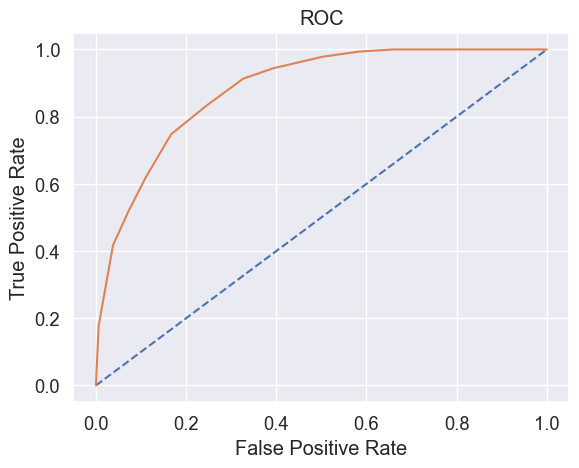

In [25]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % dt_train_auc)
# calculate roc curve
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_train_fpr, dt_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

### AUC and ROC for the test data

AUC: 0.779


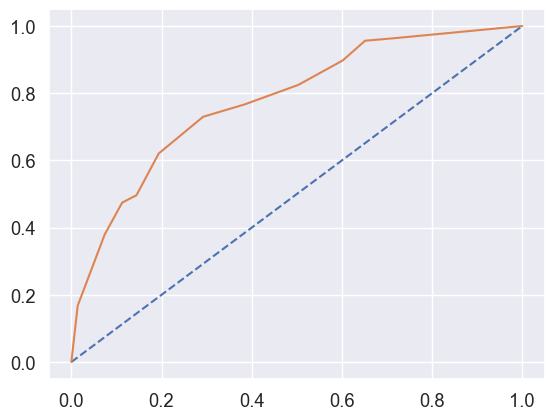

In [26]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % dt_test_auc)
# calculate roc curve
dt_test_fpr, dt_test_tpr, dt_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_test_fpr, dt_test_tpr)

### Confusion Matrix for the training data

In [27]:
confusion_matrix(train_labels, ytrain_predict)

array([[549, 110],
       [ 81, 240]], dtype=int64)

## Train Data Accuracy

In [28]:
dt_train_acc=best_grid.score(X_train,train_labels) 
dt_train_acc

0.8051020408163265

In [29]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       659
           1       0.69      0.75      0.72       321

    accuracy                           0.81       980
   macro avg       0.78      0.79      0.78       980
weighted avg       0.81      0.81      0.81       980



In [30]:
dt_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
dt_train_f1=round(df.loc["1"][2],2)
dt_train_recall=round(df.loc["1"][1],2)
dt_train_precision=round(df.loc["1"][0],2)
print ('dt_train_precision ',dt_train_precision)
print ('dt_train_recall ',dt_train_recall)
print ('dt_train_f1 ',dt_train_f1)

dt_train_precision  0.69
dt_train_recall  0.75
dt_train_f1  0.72


### Confusion Matrix for test data

In [31]:
confusion_matrix(test_labels, ytest_predict)

array([[229,  55],
       [ 52,  85]], dtype=int64)

## Test Data Accuracy

In [32]:
dt_test_acc=best_grid.score(X_test,test_labels)
dt_test_acc

0.7458432304038005

In [33]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       284
           1       0.61      0.62      0.61       137

    accuracy                           0.75       421
   macro avg       0.71      0.71      0.71       421
weighted avg       0.75      0.75      0.75       421



In [34]:
dt_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
dt_test_precision=round(df.loc["1"][0],2)
dt_test_recall=round(df.loc["1"][1],2)
dt_test_f1=round(df.loc["1"][2],2)
print ('dt_test_precision ',dt_test_precision)
print ('dt_test_recall ',dt_test_recall)
print ('dt_test_f1 ',dt_test_f1)

dt_test_precision  0.61
dt_test_recall  0.62
dt_test_f1  0.61


# Building a Random Forest Classifier

### Grid Search for finding out the optimal values for the hyper parameters

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have higher execution time, so the best values that came after the search are directly put in param_grid.

In [35]:


param_grid = {
    'max_depth': [10,20,30],
    'max_features': [3,4,5],
    'min_samples_leaf': [10,50,100],
    'min_samples_split': [50,60,70], 
    'n_estimators': [300,100,200],
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [36]:
grid_search.fit(X_train ,train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 20, 30], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [300, 100, 200]})

In [37]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 60,
 'n_estimators': 100}

In [38]:
best_grid = grid_search.best_estimator_

In [39]:
best_grid

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=60, random_state=1)

## Predicting the Training and Testing data

In [40]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [41]:
confusion_matrix(train_labels,ytrain_predict)

array([[603,  56],
       [ 89, 232]], dtype=int64)

In [42]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8520408163265306

In [43]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       659
           1       0.81      0.72      0.76       321

    accuracy                           0.85       980
   macro avg       0.84      0.82      0.83       980
weighted avg       0.85      0.85      0.85       980



In [44]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.81
rf_train_recall  0.72
rf_train_f1  0.76


Area under Curve is 0.9368343426034916


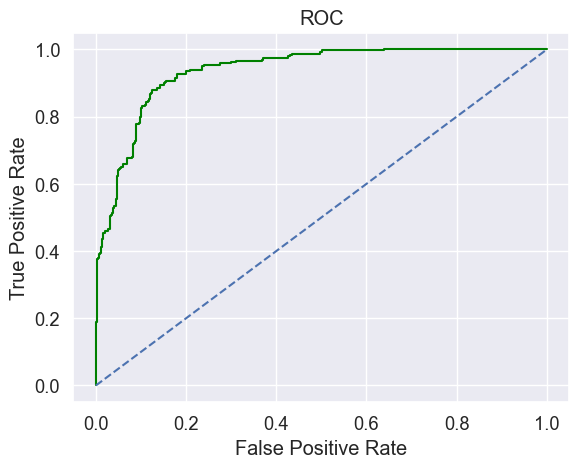

In [45]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [46]:
confusion_matrix(test_labels,ytest_predict)

array([[246,  38],
       [ 49,  88]], dtype=int64)

In [47]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7933491686460807

In [48]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       284
           1       0.70      0.64      0.67       137

    accuracy                           0.79       421
   macro avg       0.77      0.75      0.76       421
weighted avg       0.79      0.79      0.79       421



In [49]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.7
rf_test_recall  0.64
rf_test_f1  0.67


Area under Curve is 0.8478204996401768


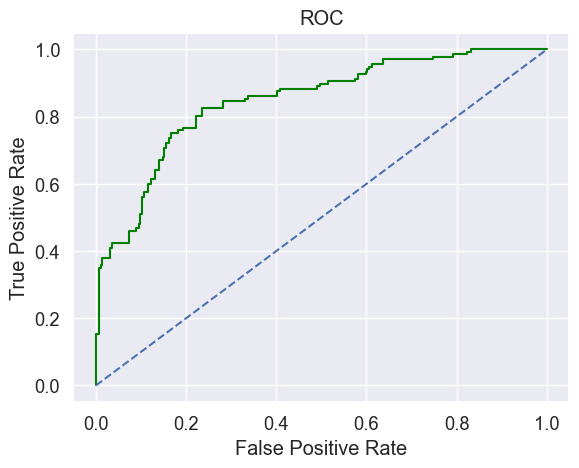

In [50]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [51]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Glucose                   0.487356
Age                       0.176979
BMI                       0.089753
DiabetesPedigreeFunction  0.068832
Pregnancies               0.062995
Insulin                   0.051799
SkinThickness             0.049998
BloodPressure             0.012288


# Building a Neural Network Classifier

In [52]:
param_grid = {
    'hidden_layer_sizes': [50,100,200], 
    'max_iter': [2500,5000],
    'solver': ['adam','sgd'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [53]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 200, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [54]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

## Predicting the Training and Testing data

In [55]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## NN Model Performance Evaluation on Training data

In [56]:
confusion_matrix(train_labels,ytrain_predict)

array([[638,  21],
       [283,  38]], dtype=int64)

In [57]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.689795918367347

In [58]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81       659
           1       0.64      0.12      0.20       321

    accuracy                           0.69       980
   macro avg       0.67      0.54      0.50       980
weighted avg       0.68      0.69      0.61       980



In [59]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.64
nn_train_recall  0.12
nn_train_f1  0.2


Area under Curve is 0.6860767990772386


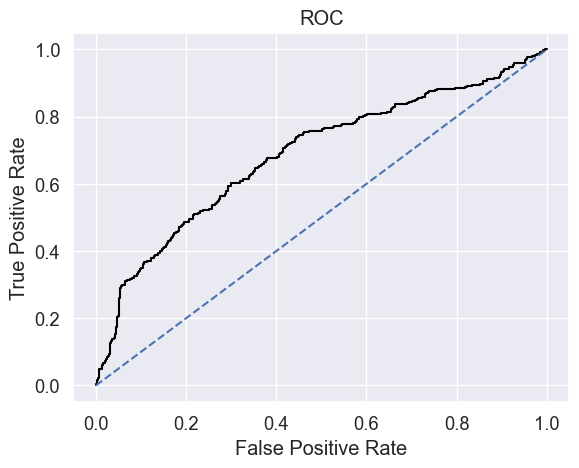

In [60]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [61]:
confusion_matrix(test_labels,ytest_predict)

array([[273,  11],
       [120,  17]], dtype=int64)

In [62]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.6888361045130641

In [63]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.96      0.81       284
           1       0.61      0.12      0.21       137

    accuracy                           0.69       421
   macro avg       0.65      0.54      0.51       421
weighted avg       0.67      0.69      0.61       421



In [64]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.61
nn_test_recall  0.12
nn_test_f1  0.21


Area under Curve is 0.6413848051814537


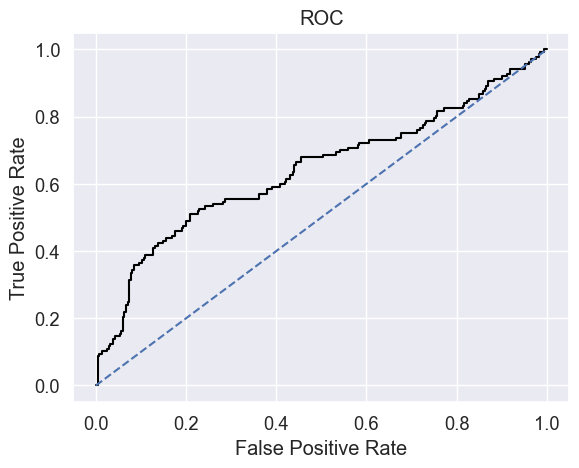

In [65]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [66]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)>

# Final Conclusion

## Comparison of the performance metrics from the 3 models

In [67]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'DT Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,DT Train,DT Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.81,0.75,0.85,0.79,0.69,0.69
AUC,0.88,0.78,0.94,0.85,0.69,0.64
Recall,0.75,0.62,0.72,0.64,0.12,0.12
Precision,0.69,0.61,0.81,0.70,0.64,0.61
F1 Score,0.72,0.61,0.76,0.67,0.20,0.21


## ROC Curve for the 3 models on the Training data

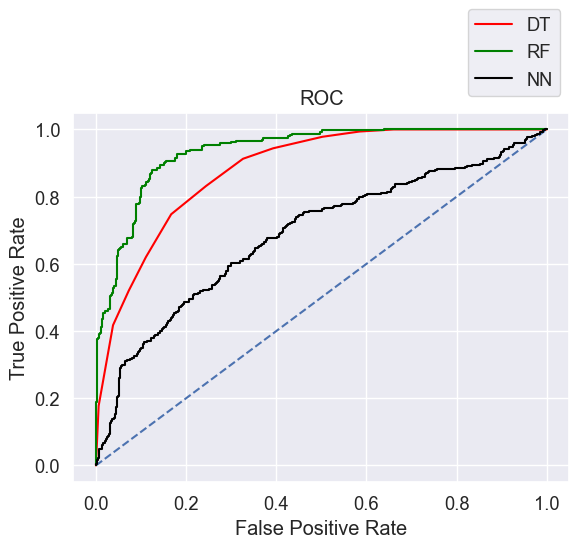

In [68]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_train_fpr, dt_train_tpr,color='red',label="DT")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

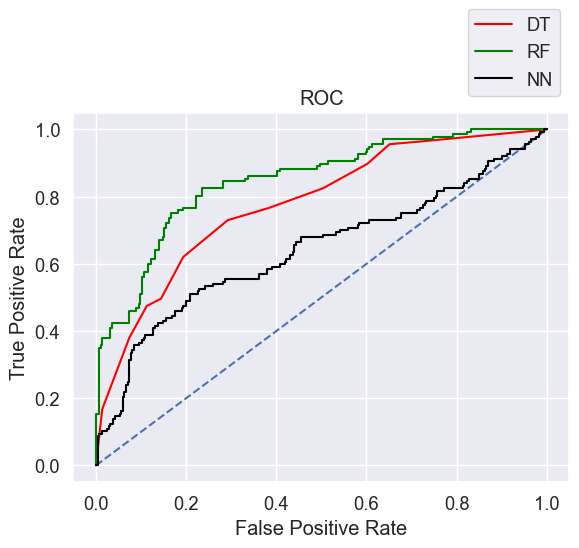

In [69]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_test_fpr, dt_test_tpr,color='red',label="DT")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the DT and Neural network model

Overall all the 3 models are reasonably stable enough to be used for making any future predictions.However, we are opting Random Forest for prediction for our project


## Using RF for final prediction 

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Pregnancies = int(input('Enter your Pregnancies (if any): '))
Glucose = int(input('Enter your Glucose: '))
BloodPressure = int(input('Enter your blood pressure: '))
SkinThickness = int(input('Enter your skin thickness: '))
Insulin = int(input('Enter your insulin level: '))
BMI = float(input('Enter your BMI: '))
DiabetesPedigreeFunction = float(input('Enter your pedigree function: '))
Age=int(input('Enter your age '))


# preprocess the user inputs
user_inputs = scaler.transform([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI, DiabetesPedigreeFunction,Age]])

# make the prediction
try:
    prediction = grid_search.predict(user_inputs)[0]
    if prediction == 0:
        print('You are not at risk of diabetes.')
    else:
        print('You are at risk of diabetes.')
except:
    print('Error')

Enter your Pregnancies (if any): 1
Enter your Glucose: 88
Enter your blood pressure: 68
Enter your skin thickness: 34
Enter your insulin level: 77
Enter your BMI: 37.6
Enter your pedigree function: 0.401
Enter your age 24
You are not at risk of diabetes.


C:\Users\Khushboo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


# 